In [11]:
import math # Import math
import numpy as np # Import numpy
from scipy.integrate import quad # Import quad from scipy
from matplotlib import pyplot as plt # Import matplotlib

In [12]:
def Ptau(x, t):
    if abs(x)-t <= 0:
        return 1
    else: return 0

In [13]:
def Jcurrent(x, xi, l, s, k): # steplike current density 
    return (xi * Ptau(x, 0.5) + Ptau((x-(l+s)/2), s/2) + Ptau((x+(l+s)/2), s/2))*math.cos(k*x)

def Jcdensity(x, xi, l, s):#current density 
    y = []
    for i in range(len(x)):
        y.append((xi * Ptau(x[i], 0.5) + Ptau((x[i]-((l+s)/2)), s/2) + Ptau((x[i]+((l+s)/2)), s/2)))
    return y

def Jcurmax(xi, l, s):#maximum joshephson current
    return ((xi * l) + (2*s))

In [14]:
def steplike(xi, s):
    x=[]
    y=[]
    l = 1 - (2*s)
    jcmax = Jcurmax(xi, l, s)
    for i in range(0,500):
        val = quad(Jcurrent, -0.5, 0.5, args=(xi, l, s, 2*math.pi * i/25), epsabs = 1e-4,  limit=100)
        x.append(i/25)
        y.append(abs(val[0]/jcmax))
        
    xx = np.linspace(-0.50, 0.50, 1000)
    yy  = Jcdensity(xx, xi, l, s)
    
    plt.style.use("seaborn-talk")
    fig, ax = plt.subplots()
    ax.plot(x, y, color = "red", lw = "2", linestyle = "-", label = r"$\xi=%0.2f$ and $s/L=%0.2f$ "%(xi, s))
    ax.set_title(r"Plot between $\frac{I_{1}(\phi)}{I_{1}(0)}$ vs $\phi/\phi_{0}$ for steplike current density profile")
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.set_xlabel(r"$\phi/\phi_{0}$")
    ax.set_ylabel(r"$\frac{I_{1}(\phi)}{I_{1}(0)}$")
    ax.fill_between(x, y, color = "red", alpha = 0.1)
    ax.set_xlim(0, 20)
    ax.set_ylim(0, 1.2)

    axins  = ax.inset_axes([0.45, 0.45, 0.4, 0.4], zorder = 2)
    axins.grid(True, linestyle='--', linewidth=0.5)
    axins.set_xlim(-0.5, 0.5)
    axins.set_xlabel(r"$L$")
    axins.set_ylabel(r"$J_{1}$")
    axins.set_title("current density")
    axins.plot(xx, yy, color = "blue", lw = "2", linestyle = "-", label = "Steplike")
    axins.fill_between(xx, yy, color = "blue", alpha=0.1)
    # axins.set_ylim(0, 1.1)
    plt.legend()
    # fig = plt.gcf()
    # fig.set_size_inches(12, 8)
    #plt.savefig("plotting\Plot1_xi%0.2f_sL%0.2f.png"%(xi, s))
    plt.show()

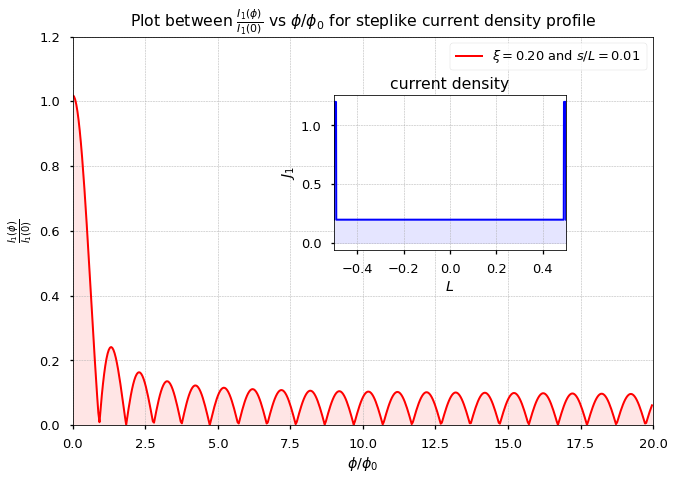

In [15]:
steplike(0.2, 0.01)# L = 1, l = L-2s

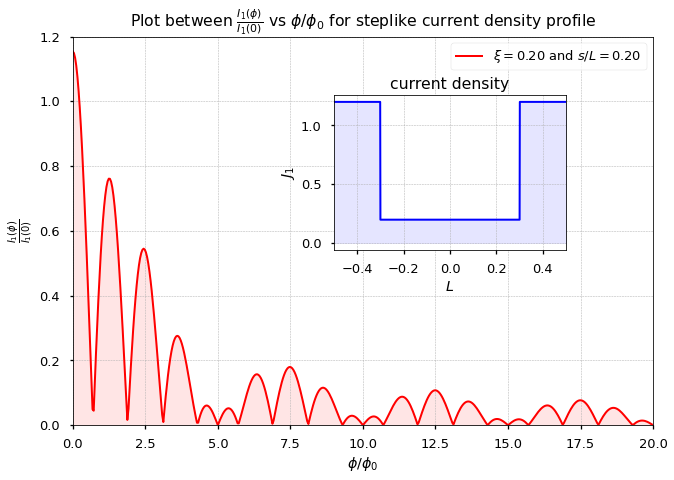

In [16]:
steplike(0.2, 0.2)

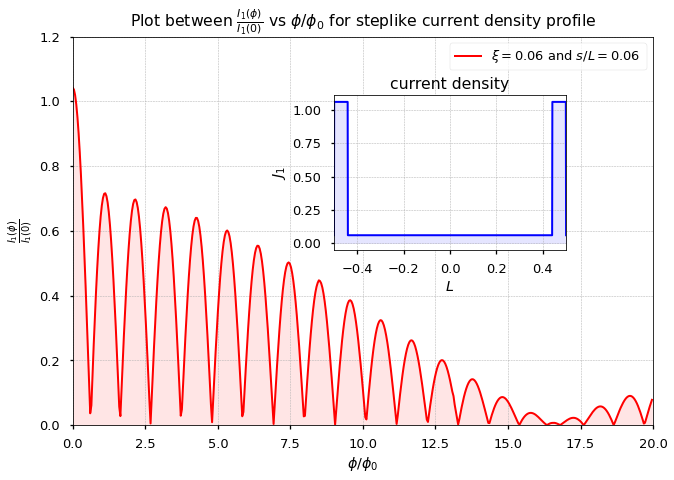

In [17]:
steplike(0.06, 0.06)

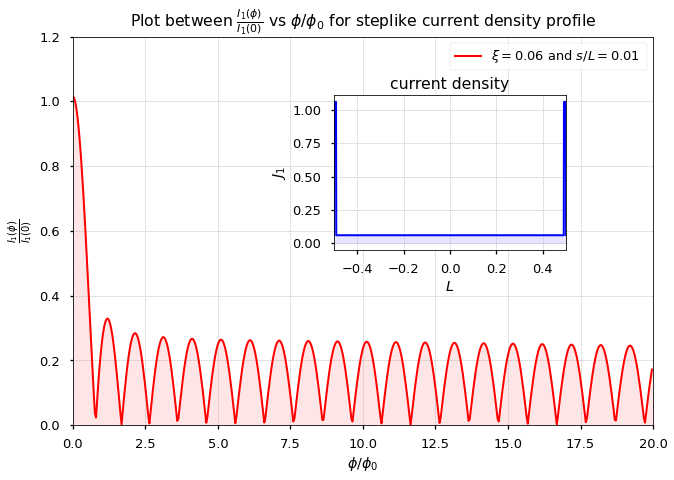

In [18]:
steplike(0.06, 0.01)

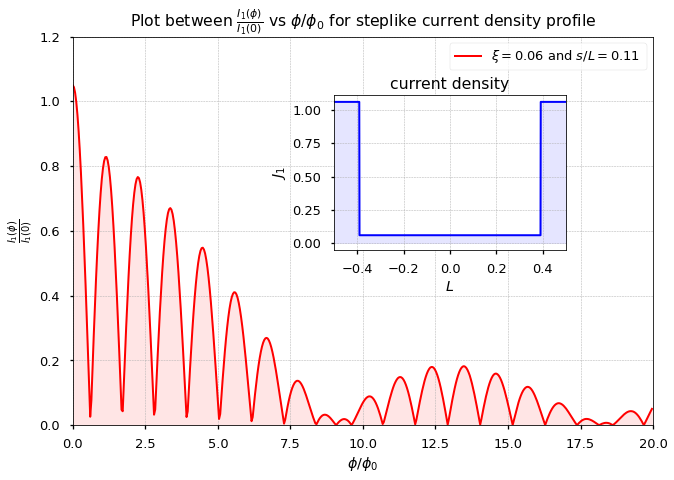

In [19]:
steplike(0.06, 0.11)